In [10]:
import os

def parse_bvh_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    motion_data_start = False
    motion_data = []

    for line in lines:
        if "Frame Time:" in line:
            motion_data_start = True
            continue

        if motion_data_start:
            motion_data.append(line)

    return ''.join(motion_data)

In [11]:
file_path = "./data/OMG_1.bvh"
file_path_b = "./data/chejo.bvh"
motion_data_string = parse_bvh_file(file_path)
motion_data_string_b = parse_bvh_file(file_path_b)

In [12]:
def process_string(input_string):
    # 1. 각 라인 별로 맨 마지막 숫자 뒤에 위치한 띄어쓰기를 지움
    cleaned_lines = []
    for line in input_string.split('\n'):
        cleaned_line = line.rstrip(' ')
        cleaned_lines.append(cleaned_line)

    # 2. '개행 문자'를 기준으로 하여 인풋을 나누고, 각 인풋을 임의의 리스트에 추가
    lines_list = cleaned_lines

    # 3. 인풋을 띄어쓰기(' ')를 기준으로 하여 임의의 리스트에 추가하고, 이 리스트를 임의의 리스트에 추가
    # 이때, 인풋은 float 형식으로 캐스팅
    float_list = []
    for line in lines_list:
        float_line = [float(num) for num in line.split()]
        float_list.append(float_line)

    # 4. 2의 리스트와 3의 리스트를 반환
    return lines_list, float_list

In [13]:
input_string = motion_data_string
lines_list, float_list = process_string(input_string)
float_list.pop(-1)
# print("Lines List:", lines_list)
# print("Float List:", float_list)

[]

In [14]:
input_string_b = motion_data_string_b
lines_list_b, float_list_b = process_string(input_string_b)
float_list_b.pop(-1)
# print("Float List:", float_list)

[]

In [15]:
def parse_joints_bvh(file_path):
    joint_text = ""
    with open(file_path, 'r') as file:
        lines = file.readlines()
        record = False
        for line in lines:
            if "HIERARCHY" in line:
                record = True
            if "MOTION" in line:
                record = False
                break
            if record:
                joint_text += line
    return joint_text

In [18]:
import re

file_path = "./data/OMG_1.bvh"
joint_text = parse_joints_bvh(file_path)

pattern = r'\b\w*JNT\w*\b'
result = re.findall(pattern, joint_text)

jnt_words = list(result)

jnt_words.insert(0, 'hips_JNT_pos')
print(jnt_words)
print(len(jnt_words))

['hips_JNT_pos', 'hips_JNT', 'spine_JNT', 'spine1_JNT', 'spine2_JNT', 'neck_JNT', 'head_JNT', 'l_shoulder_JNT', 'l_arm_JNT', 'l_forearm_JNT', 'l_hand_JNT', 'l_handThumb1_JNT', 'l_handThumb2_JNT', 'l_handThumb3_JNT', 'l_handIndex1_JNT', 'l_handIndex2_JNT', 'l_handIndex3_JNT', 'l_handMiddle1_JNT', 'l_handMiddle2_JNT', 'l_handMiddle3_JNT', 'l_handRing1_JNT', 'l_handRing2_JNT', 'l_handRing3_JNT', 'l_handPinky1_JNT', 'l_handPinky2_JNT', 'l_handPinky3_JNT', 'r_shoulder_JNT', 'r_arm_JNT', 'r_forearm_JNT', 'r_hand_JNT', 'r_handThumb1_JNT', 'r_handThumb2_JNT', 'r_handThumb3_JNT', 'r_handIndex1_JNT', 'r_handIndex2_JNT', 'r_handIndex3_JNT', 'r_handMiddle1_JNT', 'r_handMiddle2_JNT', 'r_handMiddle3_JNT', 'r_handRing1_JNT', 'r_handRing2_JNT', 'r_handRing3_JNT', 'r_handPinky1_JNT', 'r_handPinky2_JNT', 'r_handPinky3_JNT', 'l_upleg_JNT', 'l_leg_JNT', 'l_foot_JNT', 'l_toebase_JNT', 'r_upleg_JNT', 'r_leg_JNT', 'r_foot_JNT', 'r_toebase_JNT']
53


In [22]:
print(jnt_words.index("r_forearm_JNT"), jnt_words.index("r_arm_JNT"), jnt_words.index("r_shoulder_JNT"))
print(jnt_words.index("r_forearm_JNT")*3, jnt_words.index("r_arm_JNT")*3, jnt_words.index("r_shoulder_JNT")*3)

28 27 26
84 81 78


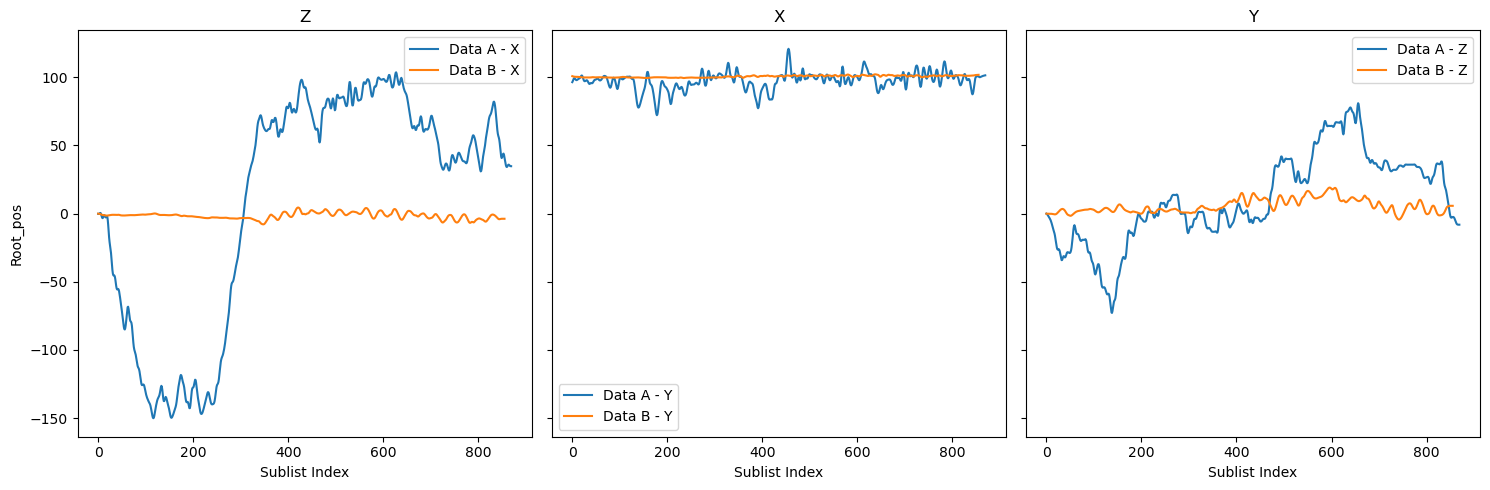

In [24]:
import matplotlib.pyplot as plt

def plot_index_values(ax, data, index, label):
    extracted_values = [sublist[index] for sublist in data]
    ax.plot(extracted_values, label=label)
    ax.legend()

def show_combined_plot(index):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    
    plot_index_values(axes[0], data_a, index, label='Data A - X')
    plot_index_values(axes[0], data_b, index, label='Data B - X')
    axes[0].set_title('Z')
    axes[0].set_xlabel('Sublist Index')
    axes[0].set_ylabel('Root_pos')

    plot_index_values(axes[1], data_a, index+1, label='Data A - Y')
    plot_index_values(axes[1], data_b, index+1, label='Data B - Y')
    axes[1].set_title('X')
    axes[1].set_xlabel('Sublist Index')

    plot_index_values(axes[2], data_a, index+2, label='Data A - Z')
    plot_index_values(axes[2], data_b, index+2, label='Data B - Z')
    axes[2].set_title('Y')
    axes[2].set_xlabel('Sublist Index')

    plt.tight_layout()
    plt.show()

data_a = float_list
data_b = float_list_b

show_combined_plot(0)

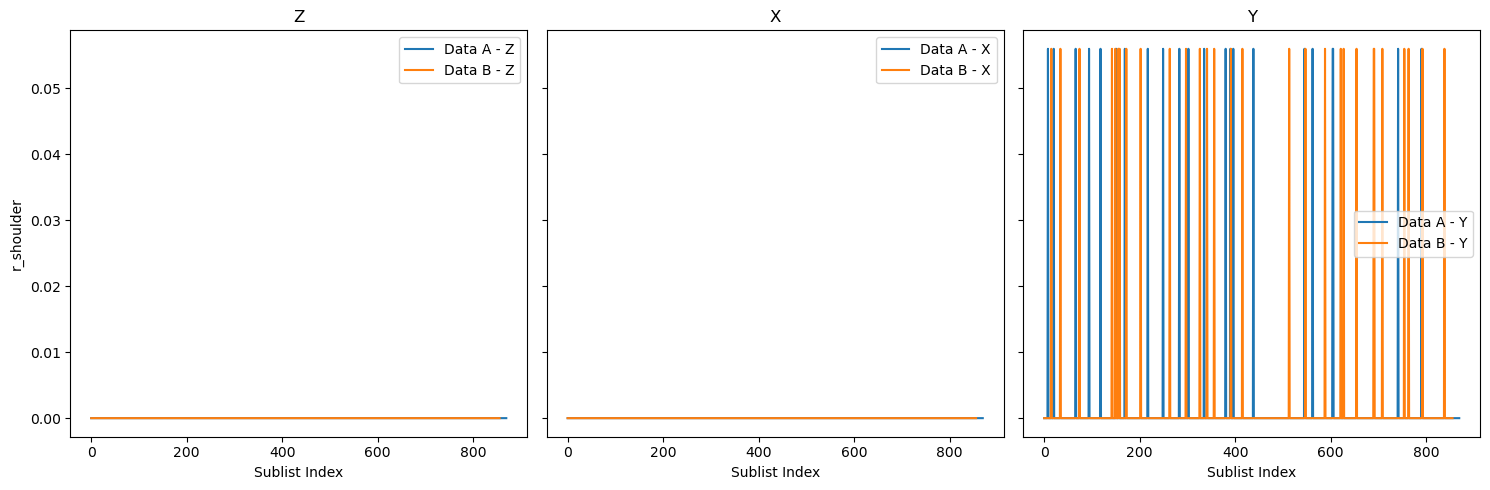

In [20]:
import matplotlib.pyplot as plt

def plot_index_values(ax, data, index, label):
    extracted_values = [sublist[index] for sublist in data]
    ax.plot(extracted_values, label=label)
    ax.legend()

def show_combined_plot(index):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    
    plot_index_values(axes[0], data_a, index, label='Data A - Z')
    plot_index_values(axes[0], data_b, index, label='Data B - Z')
    axes[0].set_title('Z')
    axes[0].set_xlabel('Sublist Index')
    axes[0].set_ylabel('r_shoulder')

    plot_index_values(axes[1], data_a, index+1, label='Data A - X')
    plot_index_values(axes[1], data_b, index+1, label='Data B - X')
    axes[1].set_title('X')
    axes[1].set_xlabel('Sublist Index')

    plot_index_values(axes[2], data_a, index+2, label='Data A - Y')
    plot_index_values(axes[2], data_b, index+2, label='Data B - Y')
    axes[2].set_title('Y')
    axes[2].set_xlabel('Sublist Index')

    plt.tight_layout()
    plt.show()

data_a = float_list
data_b = float_list_b

show_combined_plot(78)

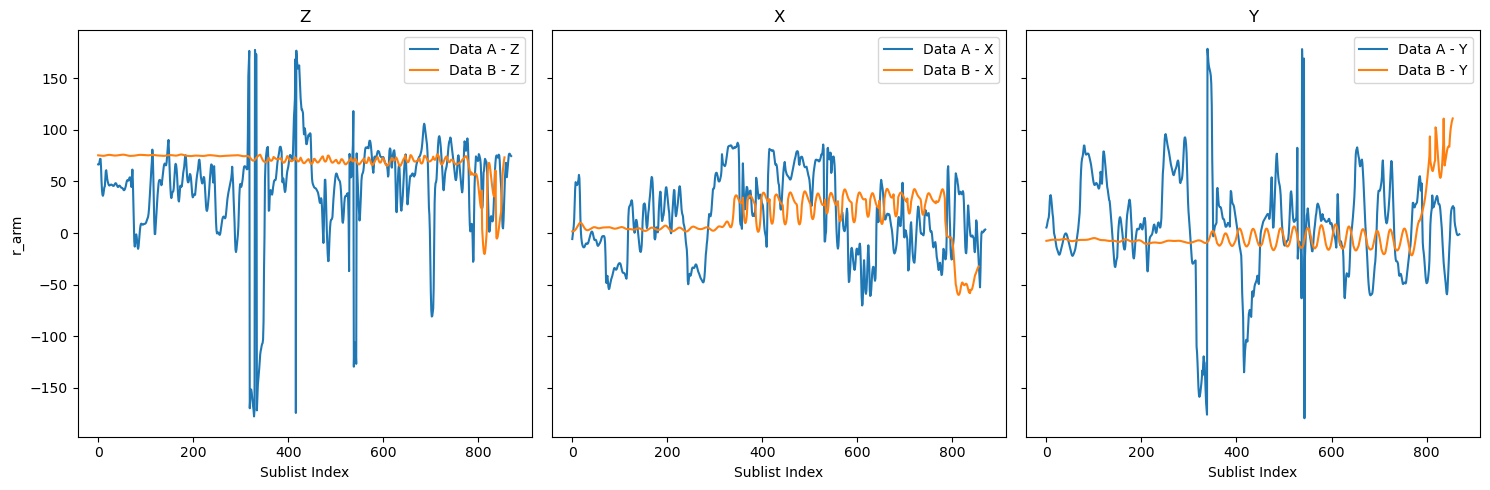

In [21]:
import matplotlib.pyplot as plt

def plot_index_values(ax, data, index, label):
    extracted_values = [sublist[index] for sublist in data]
    ax.plot(extracted_values, label=label)
    ax.legend()

def show_combined_plot(index):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    
    plot_index_values(axes[0], data_a, index, label='Data A - Z')
    plot_index_values(axes[0], data_b, index, label='Data B - Z')
    axes[0].set_title('Z')
    axes[0].set_xlabel('Sublist Index')
    axes[0].set_ylabel('r_arm')

    plot_index_values(axes[1], data_a, index+1, label='Data A - X')
    plot_index_values(axes[1], data_b, index+1, label='Data B - X')
    axes[1].set_title('X')
    axes[1].set_xlabel('Sublist Index')

    plot_index_values(axes[2], data_a, index+2, label='Data A - Y')
    plot_index_values(axes[2], data_b, index+2, label='Data B - Y')
    axes[2].set_title('Y')
    axes[2].set_xlabel('Sublist Index')

    plt.tight_layout()
    plt.show()

data_a = float_list
data_b = float_list_b

show_combined_plot(81)